<a href="https://colab.research.google.com/github/Vineetha-otl/Machine-Learning-with-Python/blob/master/Stroke_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. 
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.


Attribute Information

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass 

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# Import modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew


# Loading the dataset

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Stroke prediction/healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Getting some basic information about the dataset

In [ ]:
# By default shows top 5 rows from the dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# By default shows last 5 rows from the dataset
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
# Shows number of rows and columns
df.shape

(5110, 12)

In [ ]:
# Shows the total number of elements
df.size

61320

In [ ]:
# Shows each column name
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# Exploratory data analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
df.ever_married.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df.work_type.unique()     

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
df.Residence_type.unique()       

array(['Urban', 'Rural'], dtype=object)

In [ ]:
df.smoking_status.unique()       

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
df['gender'].replace(['Male', 'Female','Other',],
                        [0, 1,2], inplace=True)

In [ ]:
df['ever_married'].replace(['Yes', 'No'],
                        [0, 1], inplace=True)

In [ ]:
df['Residence_type'].replace(['Urban', 'Rural'],
                        [0, 1], inplace=True)

In [ ]:
work_type_dict1={'Private':0, 'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':4}
df['work_type']=df['work_type'].map(work_type_dict1)


In [ ]:
smoking_status_dict1={'formerly smoked':0, 'never smoked':1,'smokes':2,'Unknown':3}
df['smoking_status']=df['smoking_status'].map(smoking_status_dict1)


In [ ]:
# Shows datatypes of columns
df.dtypes

id                     int64
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

# Checking for duplicates

In [ ]:
df.duplicated().sum()

0

# Checking for null values

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# df.groupby('stroke').mean()

In [ ]:
#df1 = df['stroke']

In [ ]:
""" bmi0 = 0
bmi1 = 0
for i in df['stroke']:
  if i ==0:
       bmi0 = bmi0+1
  else:
    bmi1 = bmi1+1
      
print(bmi0)
print(bmi1) """

" bmi0 = 0\nbmi1 = 0\nfor i in df['stroke']:\n  if i ==0:\n       bmi0 = bmi0+1\n  else:\n    bmi1 = bmi1+1\n      \nprint(bmi0)\nprint(bmi1) "

In [ ]:
# Checking total value counts for positive and negative cases
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
Stroke=df[df.stroke==1]
Non_Stroke=df[df.stroke==0]

In [ ]:
Stroke.isna().sum()

id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  40
smoking_status        0
stroke                0
dtype: int64

In [ ]:
Non_Stroke.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  161
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# Gives Statiscal description for the dataset
df.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,5110.000000
mean,36517.829354,0.586301,43.226614,0.097456,0.054012,0.343836,0.837965,0.491977,106.147677,28.893237,1.585519,0.048728
std,21161.721625,0.492941,22.612647,0.296607,0.226063,0.475034,1.118698,0.499985,45.283560,7.854067,1.092522,0.215320
min,67.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,17741.250000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.245000,23.500000,1.000000,0.000000
50%,36932.000000,1.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91.885000,28.100000,1.000000,0.000000
75%,54682.000000,1.000000,61.000000,0.000000,0.000000,1.000000,2.000000,1.000000,114.090000,33.100000,3.000000,0.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [ ]:
# Filling the null values by median for bmi column
df['bmi'].fillna(df['bmi'].median(), inplace=True)

In [ ]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
""" Stroke=df[df2.stroke==1]
Non_Stroke=df[df2.stroke==0] """


' Stroke=df[df2.stroke==1]\nNon_Stroke=df[df2.stroke==0] '

# Skewness

id
-0.01990713341679493


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


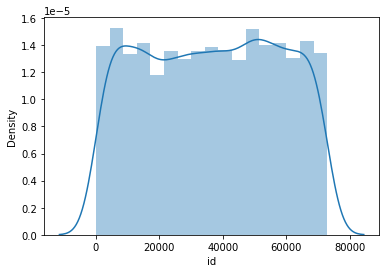

gender
-0.34556231027030465


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


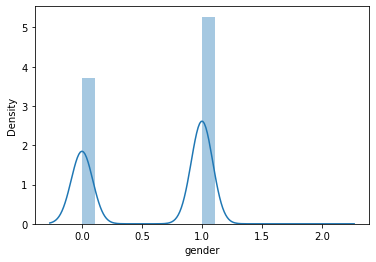

age
-0.1370190866396024


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


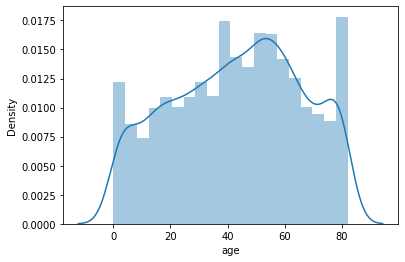

hypertension
2.714594511421973


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


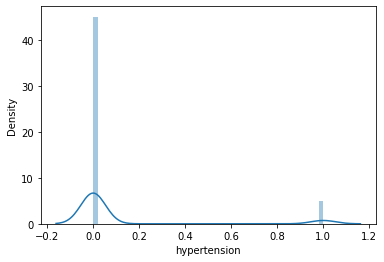

heart_disease
3.9460851899886302


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


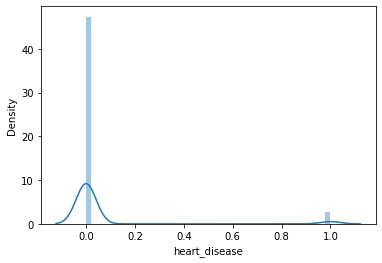

ever_married
0.6575521915370907


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


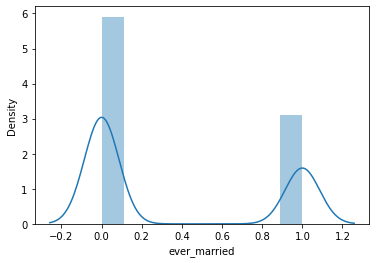

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


work_type
0.9720011501364147


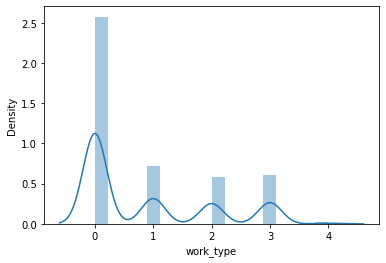

Residence_type
0.03209806643844599


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


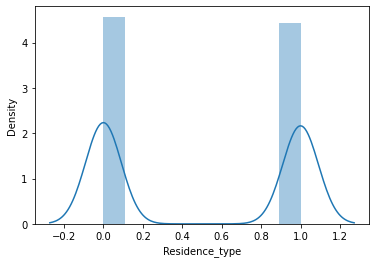

avg_glucose_level
1.571822297397199


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


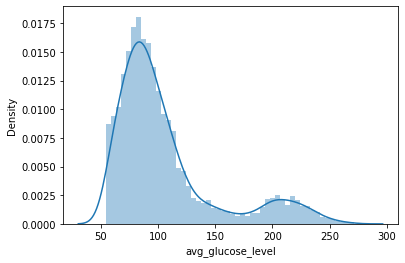

bmi
1.0878677778570507


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


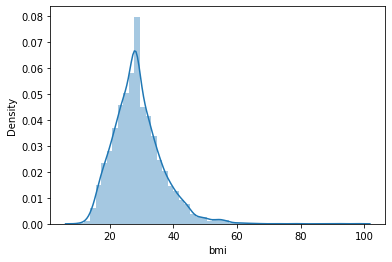

smoking_status
0.07783971063467907


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


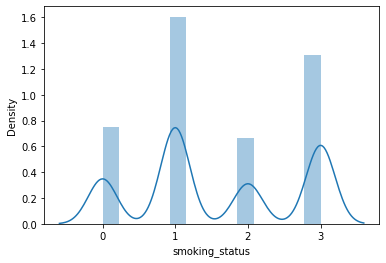

stroke
4.192053480263753


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


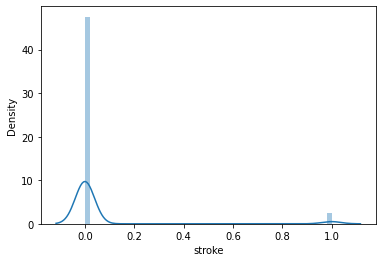

In [ ]:
for columns in df:
    print(columns)
    print(skew(df[columns]))
    plt.figure()
    sns.distplot(df[columns])
    plt.show()

In [ ]:
df.skew()

id                  -0.019913
gender              -0.345664
age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
ever_married         0.657745
work_type            0.972287
Residence_type       0.032107
avg_glucose_level    1.572284
bmi                  1.088187
smoking_status       0.077863
stroke               4.193284
dtype: float64

# Drop columns


In [ ]:
df = df.drop(columns=['id','ever_married','work_type','Residence_type'],axis = 1)

In [ ]:
df

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,228.69,36.6,0,1
1,1,61.0,0,0,202.21,28.1,1,1
2,0,80.0,0,1,105.92,32.5,1,1
3,1,49.0,0,0,171.23,34.4,2,1
4,1,79.0,1,0,174.12,24.0,1,1
...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,83.75,28.1,1,0
5106,1,81.0,0,0,125.20,40.0,1,0
5107,1,35.0,0,0,82.99,30.6,1,0
5108,0,51.0,0,0,166.29,25.6,0,0


# Outliers detection

In [ ]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers
find_outliers_IQR(df).count()

gender                 0
age                    0
hypertension         498
heart_disease        276
avg_glucose_level    627
bmi                  126
smoking_status         0
stroke               249
dtype: int64

# Heatmap

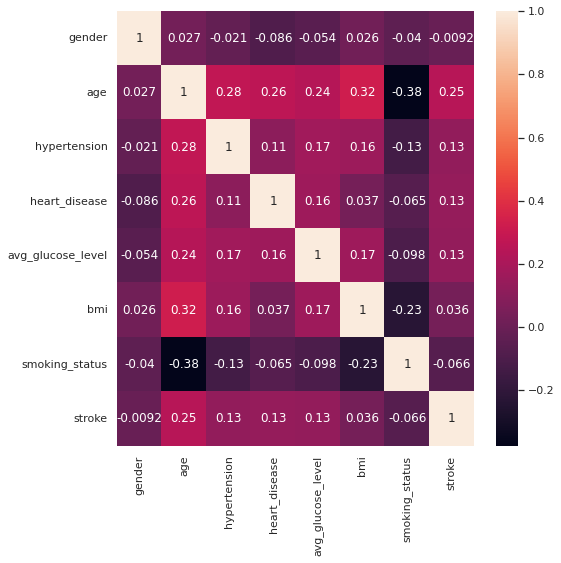

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
corr = df.corr()
sns.heatmap(corr, annot=True)

In [ ]:
""" # Shows the numerical data columns
numeric_data = df.select_dtypes("number")
numeric_data"""

' # Shows the numerical data columns\nnumeric_data = df.select_dtypes("number")\nnumeric_data'

# Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


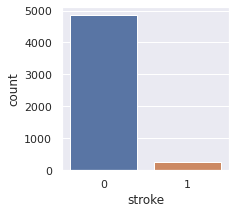

In [ ]:
# Shows the distribution between the class column
sns.set(rc={'figure.figsize':(3,3)})
sns.countplot(df['stroke'])
plt.show()

# Dataset is highly imbalanced

 0   =====> 4861  ----->No stroke

 1   =====>  249  -----> Stroke

In [ ]:
# Separating the data for analysis
Stroke     =df[df.stroke==1]
Non_Stroke =df[df.stroke==0]

In [ ]:
print(Stroke.shape)

(249, 8)


In [ ]:
print(Non_Stroke.shape)

(4861, 8)


In [ ]:
# Compare the values for both transactions
df.groupby('stroke').mean()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status
stroke,,,,,,,
0,0.587328,41.971545,0.088871,0.047110,104.795513,28.799115,1.601934
1,0.566265,67.728193,0.265060,0.188755,132.544739,30.090361,1.265060


# Dealing with imbalanced data by Under-Sampling

Build a sample dataset containing similar distribution

In [ ]:
np.random.seed(3)
Non_stroke_sample=Non_Stroke.sample(n=249) # Stroke =249 ,so we randomly sample 249 non stroke from dataset

In [ ]:
new_dataset=pd.concat([Non_stroke_sample,Stroke],axis=0)

In [ ]:
new_dataset.shape

(498, 8)

In [ ]:
new_dataset['stroke'].value_counts()

0    249
1    249
Name: stroke, dtype: int64

In [ ]:
new_dataset.groupby('stroke').mean()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status
stroke,,,,,,,
0,0.642570,40.925301,0.096386,0.028112,107.104458,28.367068,1.598394
1,0.566265,67.728193,0.265060,0.188755,132.544739,30.090361,1.265060


Here,nature of dataset is not changed--->since the mean value is not having much differnce in the values compared to original dataset it's a good sample

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
new_dataset.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
4555,1,22.0,0,0,102.00,40.4,2,0
4201,0,43.0,0,0,207.37,29.5,0,0
2737,0,55.0,0,0,163.82,27.5,1,0
4017,1,44.0,0,0,110.41,30.5,2,0
580,1,54.0,0,0,107.47,29.3,0,0


In [ ]:

from sklearn.preprocessing import MinMaxScaler
data=new_dataset.copy()
scaler = MinMaxScaler()
#data[['bmi', 'age']] = scaler.fit_transform(data[['bmi', 'age']])
#data.head()


In [ ]:
#data[['bmi', 'age',]] = scaler.fit_transform(data[['bmi', 'age']])
#data.head()

In [ ]:
data[['bmi','age','avg_glucose_level']] = scaler.fit_transform(data[['bmi','age','avg_glucose_level']])
data.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
4555,1,0.266862,0,0,0.212928,0.594862,2,0
4201,0,0.523460,0,0,0.701521,0.379447,0,0
2737,0,0.670088,0,0,0.499583,0.339921,1,0
4017,1,0.535679,0,0,0.251924,0.399209,2,0
580,1,0.657869,0,0,0.238292,0.375494,0,0


# Splitting the dataset into Features & targets

In [ ]:
X=data.drop(columns='stroke',axis=1)
Y=data['stroke']

In [ ]:
print(X)

      gender       age  hypertension  heart_disease  avg_glucose_level  \
4555       1  0.266862             0              0           0.212928   
4201       0  0.523460             0              0           0.701521   
2737       0  0.670088             0              0           0.499583   
4017       1  0.535679             0              0           0.251924   
580        1  0.657869             0              0           0.238292   
...      ...       ...           ...            ...                ...   
244        0  0.694526             0              0           0.133914   
245        1  0.169110             0              0           0.008578   
246        1  0.914467             0              0           0.105351   
247        0  0.865591             1              0           0.147083   
248        1  0.951124             0              0           0.105397   

           bmi  smoking_status  
4555  0.594862               2  
4201  0.379447               0  
2737  0.3399

In [ ]:
print(Y)

4555    0
4201    0
2737    0
4017    0
580     0
       ..
244     1
245     1
246     1
247     1
248     1
Name: stroke, Length: 498, dtype: int64


# Split the data into Training data & Testing data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=3)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(498, 7) (398, 7) (100, 7)


# Model Training

# Logistic Regression

In [ ]:
 from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression # works on linear algebra
from sklearn.tree import DecisionTreeClassifier #gini index entropy
from sklearn.ensemble import RandomForestClassifier # gini index entropy

In [ ]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
#accuracy on train data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
training_data_accuracy

0.7864321608040201

In [ ]:
#accuracy on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy1=accuracy_score(Y_test,X_test_prediction)
test_data_accuracy1

0.85

In [ ]:
recall_log = recall_score(X_test_prediction, Y_test)
precision_log = precision_score(X_test_prediction, Y_test)
print('Recall score on LogisticReg test data : ',recall_log)
print('Precision score on LogisticReg test data : ',precision_log)

Recall score on LogisticReg test data :  0.9069767441860465
Precision score on LogisticReg test data :  0.78


# Decision Tree Classifier

In [ ]:
model2= DecisionTreeClassifier()
model2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
#accuracy on train data
X_train_prediction=model2.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
training_data_accuracy

1.0

In [ ]:
#accuracy on test data
X_test_prediction=model2.predict(X_test)
test_data_accuracy2=accuracy_score(X_test_prediction,Y_test)
test_data_accuracy2

0.75

In [ ]:
recall_tree = recall_score(X_test_prediction,Y_test)
precision_tree = precision_score(X_test_prediction, Y_test)
print('Recall score on DecisionTree test data : ',recall_tree)
print('Precision score on DecisionTree test data : ',precision_tree)

Recall score on DecisionTree test data :  0.8048780487804879
Precision score on DecisionTree test data :  0.66


# random forest algorithm

In [ ]:
model3 = RandomForestClassifier()
model3.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
#accuracy on train data
train_prediction = model3.predict(X_train)
training_data_accuracy = accuracy_score(train_prediction,Y_train)
training_data_accuracy

1.0

In [ ]:
#accuracy on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy3=accuracy_score(Y_test,X_test_prediction)
test_data_accuracy3

0.85

In [ ]:
recall_forest = recall_score(X_test_prediction, Y_test)
precision_forest = precision_score(X_test_prediction, Y_test)
print('Recall score on RandomForest test data : ',recall_forest)
print('Precision score on RandomForest test data : ',precision_forest)

Recall score on RandomForest test data :  0.9069767441860465
Precision score on RandomForest test data :  0.78


In [ ]:
Models = ['Logistic Regression','Decision Tree','Random Forest']
train_accuracy = [training_data_accuracy,training_data_accuracy,training_data_accuracy]
test_accuracy = [test_data_accuracy1,test_data_accuracy2,test_data_accuracy3]
recall_score = [recall_log,recall_tree,recall_forest]
precision_score = [precision_log,precision_tree,precision_forest]

In [ ]:
Model_Scores= {'Models': Models, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Recall Score':recall_score,'Precision Score':precision_score}
df1 = pd.DataFrame(Model_Scores)
df1

,Models,Train Accuracy,Test Accuracy,Recall Score,Precision Score
0,Logistic Regression,1.0,0.85,0.906977,0.78
1,Decision Tree,1.0,0.75,0.804878,0.66
2,Random Forest,1.0,0.85,0.906977,0.78
